<a href="https://colab.research.google.com/github/VardanDavtyan/ML-DL/blob/main/ImageColorization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.layers import Conv2D, UpSampling2D, InputLayer
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator#, array_to_img, img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb
from skimage.io import imsave
import numpy as np
from google.colab import files
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
upl = files.upload()
names = list(upl.keys())
img = Image.open(BytesIO(upl[names[0]]))

Saving img.jpg to img (4).jpg


In [ ]:
def processed_image(img):
  image = img.resize( (256, 256), Image.BILINEAR)
  image = np.array(image, dtype=float)
  size = image.shape
  lab = rgb2lab(1.0/255*image)
  X, Y = lab[:,:,0], lab[:,:,1:]

  Y /= 128    # нормируем выходные значение в диапазон от -1 до 1
  X = X.reshape(1, size[0], size[1], 1)
  Y = Y.reshape(1, size[0], size[1], 2)
  return X, Y, size

X, Y, size = processed_image(img)

In [ ]:
model = Sequential()
model.add(InputLayer(input_shape=(None, None, 1)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))
model.add(UpSampling2D((2, 2)))

In [ ]:
model.compile(optimizer='adam', loss='mse')
model.fit(x=X, y=Y, batch_size=1, epochs=200)

Epoch 1/200
1/1 [==============================] - 4s 4s/step - loss: 0.0046
Epoch 2/200
1/1 [==============================] - 1s 1s/step - loss: 0.2451
Epoch 3/200
1/1 [==============================] - 1s 1s/step - loss: 0.0060
Epoch 4/200
1/1 [==============================] - 1s 1s/step - loss: 0.0132
Epoch 5/200
1/1 [==============================] - 1s 1s/step - loss: 0.0136
Epoch 6/200
1/1 [==============================] - 2s 2s/step - loss: 0.0131
Epoch 7/200
1/1 [==============================] - 2s 2s/step - loss: 0.0127
Epoch 8/200
1/1 [==============================] - 1s 1s/step - loss: 0.0122
Epoch 9/200
1/1 [==============================] - 1s 1s/step - loss: 0.0118
Epoch 10/200
1/1 [==============================] - 1s 1s/step - loss: 0.0108
Epoch 11/200
1/1 [==============================] - 1s 1s/step - loss: 0.0092
Epoch 12/200
1/1 [==============================] - 1s 1s/step - loss: 0.0113
Epoch 13/200
1/1 [==============================] - 1s 1s/step - loss: 0.

In [ ]:
upl = files.upload()
names = list(upl.keys())
img = Image.open(BytesIO(upl[names[0]]))
X, Y, size = processed_image(img)

Saving MNIZD52u5NRE8YyQBO6TH3n_s4X7IwRWkaVWyBV3KIzKECzLYcwxpg1_-42IXetKLwgLae_CSFYrfo9z3mI80PzNp8XC.jpg to MNIZD52u5NRE8YyQBO6TH3n_s4X7IwRWkaVWyBV3KIzKECzLYcwxpg1_-42IXetKLwgLae_CSFYrfo9z3mI80PzNp8XC.jpg


1/1 [==============================] - 0s 306ms/step


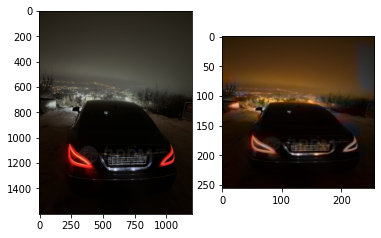

In [ ]:
output = model.predict(X)

output *= 128
min_vals, max_vals = -128, 127
ab = np.clip(output[0], min_vals, max_vals)

cur = np.zeros((size[0], size[1], 3))
cur[:,:,0] = np.clip(X[0][:,:,0], 0, 100)
cur[:,:,1:] = ab
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(lab2rgb(cur))